In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV

In [2]:
df=pd.read_csv("/content/sba_loans_processed.csv")
df.info()
columns_to_keep = [
    'ChgOffPrinGr',  # Numerical
    'Term',          # Numerical
    'UrbanRural',    # Categorical
    'RevLineCr',     # Categorical
    'LowDoc',        # Categorical
    'BankState',     # Categorical
    'State',         # Categorical
    'NAICS',
    'MIS_Status',
    'DisbursementGross'# Categorical
]

# Filter the dataset to retain only the specified columns
df_cleaned = df[columns_to_keep]

# Display the first few rows of the filtered dataset
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               899164 non-null  float64
 1   NoEmp              899164 non-null  float64
 2   CreateJob          899164 non-null  float64
 3   RetainedJob        899164 non-null  float64
 4   BalanceGross       899164 non-null  float64
 5   ChgOffPrinGr       899164 non-null  float64
 6   GrAppv             899164 non-null  float64
 7   SBA_Appv           899164 non-null  float64
 8   DisbursementTime   896796 non-null  float64
 9   ChgOffTime         162699 non-null  float64
 10  DisbursementGross  899164 non-null  float64
 11  State              899164 non-null  int64  
 12  BankState          899164 non-null  int64  
 13  NAICS              899164 non-null  int64  
 14  ApprovalFY         899164 non-null  int64  
 15  NewExist           897994 non-null  float64
 16  Fr

In [3]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872919 entries, 0 to 899163
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ChgOffPrinGr       872919 non-null  float64
 1   Term               872919 non-null  float64
 2   UrbanRural         872919 non-null  int64  
 3   RevLineCr          872919 non-null  float64
 4   LowDoc             872919 non-null  float64
 5   BankState          872919 non-null  int64  
 6   State              872919 non-null  int64  
 7   NAICS              872919 non-null  int64  
 8   MIS_Status         872919 non-null  float64
 9   DisbursementGross  872919 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 73.3 MB


<ipython-input-3-1a09b213660a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [21]:
# Define your feature set and target
X = df_cleaned[['ChgOffPrinGr', 'Term', 'UrbanRural', 'RevLineCr', 'LowDoc', 'BankState', 'State', 'NAICS']]  # Exclude DisbursementGross
y = df_cleaned['MIS_Status']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store DisbursementGross separately for later use
disbursement_test = df_cleaned.loc[X_test.index, 'DisbursementGross']  # Align DisbursementGross with X_test


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize and fit kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))

kNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    144742
         1.0       0.84      0.58      0.69     29842

    accuracy                           0.91    174584
   macro avg       0.88      0.78      0.82    174584
weighted avg       0.90      0.91      0.90    174584



In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    144742
         1.0       0.97      0.96      0.97     29842

    accuracy                           0.99    174584
   macro avg       0.98      0.98      0.98    174584
weighted avg       0.99      0.99      0.99    174584



In [7]:
from sklearn.ensemble import BaggingClassifier

# Initialize and fit bagging classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    144742
         1.0       0.97      0.99      0.98     29842

    accuracy                           0.99    174584
   macro avg       0.98      0.99      0.99    174584
weighted avg       0.99      0.99      0.99    174584



In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit boosting classifier
boosting = GradientBoostingClassifier(random_state=42)
boosting.fit(X_train, y_train)

# Predict and evaluate
y_pred_boosting = boosting.predict(X_test)
print("Boosting Classification Report:\n", classification_report(y_test, y_pred_boosting))

Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    144742
         1.0       0.97      1.00      0.98     29842

    accuracy                           0.99    174584
   macro avg       0.98      0.99      0.99    174584
weighted avg       0.99      0.99      0.99    174584



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    144742
         1.0       0.97      0.99      0.98     29842

    accuracy                           0.99    174584
   macro avg       0.98      0.99      0.99    174584
weighted avg       0.99      0.99      0.99    174584



In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression
logit = LogisticRegression(random_state=42, max_iter=1000)
logit.fit(X_train, y_train)

# Predict and evaluate
y_pred_logit = logit.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logit))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    144742
         1.0       0.98      0.90      0.94     29842

    accuracy                           0.98    174584
   macro avg       0.98      0.95      0.96    174584
weighted avg       0.98      0.98      0.98    174584



In [11]:
from sklearn.linear_model import LogisticRegressionCV

# Initialize and fit with L1, L2, and ElasticNet penalties
lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=100, random_state=42).fit(X_train, y_train)
ridge = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=100, random_state=42).fit(X_train, y_train)
elastic = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=100, random_state=42).fit(X_train, y_train)

#Evaluate
print("Lasso Classification Report:\n", classification_report(y_test, lasso.predict(X_test)))
print("Ridge Classification Report:\n", classification_report(y_test, ridge.predict(X_test)))
print("ElasticNet Classification Report:\n", classification_report(y_test, elastic.predict(X_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Lasso Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    144742
         1.0       0.99      0.80      0.88     29842

    accuracy                           0.96    174584
   macro avg       0.97      0.90      0.93    174584
weighted avg       0.97      0.96      0.96    174584

Ridge Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    144742
         1.0       0.98      0.90      0.94     29842

    accuracy                           0.98    174584
   macro avg       0.98      0.95      0.96    174584
weighted avg       0.98      0.98      0.98    174584

ElasticNet Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    144742
         1.0       0.98      0.85      0.91     29842

    accuracy                           0.97    174584
   macro avg       0.98      0.92

In [12]:
from sklearn.neural_network import MLPClassifier

# Initialize and fit neural network
nn = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

# Predict and evaluate
y_pred_nn = nn.predict(X_test)
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))


Neural Network Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    144742
         1.0       0.97      0.97      0.97     29842

    accuracy                           0.99    174584
   macro avg       0.98      0.98      0.98    174584
weighted avg       0.99      0.99      0.99    174584



In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("Linear Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_lda))

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print("Quadratic Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_qda))


Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    144742
         1.0       1.00      0.24      0.39     29842

    accuracy                           0.87    174584
   macro avg       0.93      0.62      0.66    174584
weighted avg       0.89      0.87      0.84    174584

Quadratic Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    144742
         1.0       0.99      0.80      0.88     29842

    accuracy                           0.96    174584
   macro avg       0.97      0.90      0.93    174584
weighted avg       0.96      0.96      0.96    174584



In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_net_profit(y_true, y_pred, disbursement_gross):
    """
    Calculate the net profit based on predictions, ground truth, and disbursement gross amounts.

    Parameters:
    - y_true: Array of true labels (0 for Default, 1 for Paid in full)
    - y_pred: Array of predicted labels (0 for Default, 1 for Paid in full)
    - disbursement_gross: Array of disbursement gross amounts corresponding to each loan

    Returns:
    - net_profit: The total net profit based on the cost-benefit matrix.
    """
    # Convert inputs to numpy arrays for easy indexing
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    disbursement_gross = np.array(disbursement_gross)

    # Calculate profits and costs for each prediction
    net_profit = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:  # True Positive: correctly granted loan
            net_profit += 0.05 * disbursement_gross[i]
        elif y_true[i] == 0 and y_pred[i] == 1:  # False Positive: incorrectly granted loan
            net_profit += -5 * (0.05 * disbursement_gross[i])

    return net_profit


In [22]:


# Calculate net profits for each model
net_profits = {}

# kNN
net_profits['kNN'] = calculate_net_profit(y_test, y_pred_knn, disbursement_test)

# Decision Tree
net_profits['Decision Tree'] = calculate_net_profit(y_test, y_pred_tree, disbursement_test)

# Bagging
net_profits['Bagging'] = calculate_net_profit(y_test, y_pred_bagging, disbursement_test)

# Boosting
net_profits['Boosting'] = calculate_net_profit(y_test, y_pred_boosting, disbursement_test)

# Random Forest
net_profits['Random Forest'] = calculate_net_profit(y_test, y_pred_rf, disbursement_test)

# Logistic Regression
net_profits['Logistic Regression'] = calculate_net_profit(y_test, y_pred_logit, disbursement_test)

# Lasso
net_profits['Lasso'] = calculate_net_profit(y_test, lasso.predict(X_test), disbursement_test)

# Ridge
net_profits['Ridge'] = calculate_net_profit(y_test, ridge.predict(X_test), disbursement_test)

# ElasticNet
net_profits['ElasticNet'] = calculate_net_profit(y_test, elastic.predict(X_test), disbursement_test)

# Neural Network
net_profits['Neural Network'] = calculate_net_profit(y_test, y_pred_nn, disbursement_test)

# Linear Discriminant Analysis
net_profits['LDA'] = calculate_net_profit(y_test, y_pred_lda, disbursement_test)

# Quadratic Discriminant Analysis
net_profits['QDA'] = calculate_net_profit(y_test, y_pred_qda, disbursement_test)

# Display net profits
print("Net Profits for All Models:")
for model_name, profit in net_profits.items():
    print(f"{model_name}: ${profit:,.2f}")


Net Profits for All Models:
kNN: $56,800,656.05
Decision Tree: $182,213,624.90
Bagging: $189,061,806.45
Boosting: $190,159,042.05
Random Forest: $189,049,087.25
Logistic Regression: $188,262,533.45
Lasso: $184,496,953.55
Ridge: $188,248,345.45
ElasticNet: $187,047,607.15
Neural Network: $189,781,136.25
LDA: $124,033,431.00
QDA: $185,468,120.75


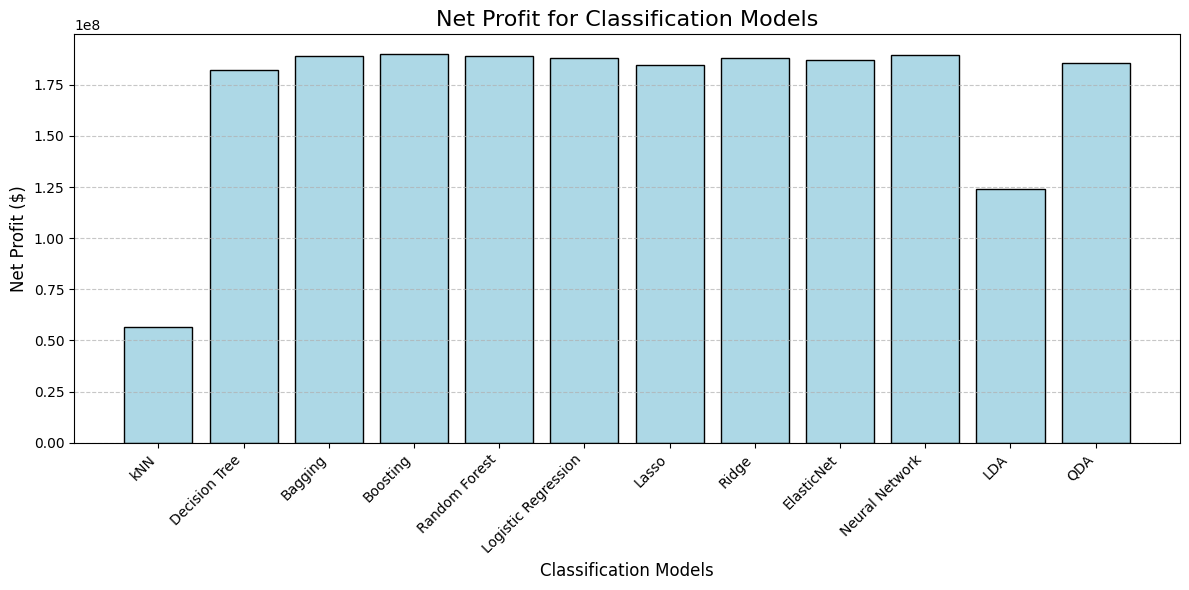

In [24]:
import matplotlib.pyplot as plt

# Plotting the net profits
plt.figure(figsize=(12, 6))
plt.bar(net_profits.keys(), net_profits.values(), color='lightblue', edgecolor='black')

# Adding labels and title
plt.xlabel("Classification Models", fontsize=12)
plt.ylabel("Net Profit ($)", fontsize=12)
plt.title("Net Profit for Classification Models", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


1. Gains Chart:
The Gains Chart visualizes the cumulative net profit achieved by progressively approving loans ranked by their predicted probability of being paid in full.

Key Properties:
X-Axis: Represents the number of loan applications, ordered by the predicted likelihood of being repaid (from highest to lowest).

Y-Axis: Represents the cumulative net profit from approving loans in sequence, where loans with higher predicted probabilities of being paid off are approved first.
Curve: The curve shows how cumulative net profit increases as you approve more loans, ranked by their predicted likelihood.

Max Net Profit Point (Red Line): This vertical line marks the point at which cumulative net profit is maximized. It helps identify how far into the ranked list of loan applications you should go to achieve the maximum net profit.
The area to the left of this line represents the set of loan applications that, when approved, maximize the net profit.
What the Gains Chart Tells Us:
Increasing Net Profit: The chart should ideally show an upward trend, indicating that approving higher-risk loans (with lower probabilities of repayment) leads to progressively higher net profit, at least up to the optimal point.

Maximum Profit: The point at which the cumulative net profit plateaus or starts decreasing marks the optimal point for loan approval. Going beyond this point leads to diminishing returns (i.e., more risky loans that generate losses).

Optimal Loan Approval Range: The "Max Net Profit Point" tells you how far into the ranked list of applicants you should approve loans to maximize your net profit. If the max profit occurs early in the list, then approving fewer loans is more profitable.


Insights:
If the curve is steep early on and then flattens out, it means that approving the top-ranked loans (those with high probabilities of repayment) generates most of the profit.
If the curve continues to rise with a smaller slope, approving loans with lower probabilities (riskier) can still be beneficial but will eventually yield diminishing returns.


2. Lift Chart:
The Lift Chart compares the cumulative net profit of your model against a random selection of loan applications.

Key Properties:

X-Axis: Represents the number of loan applications, again ordered by their predicted probabilities of repayment.

Y-Axis: Represents the cumulative net profit for both the model (from ranked predictions) and a random selection (from randomly selecting loans).

Model Net Profit Curve: This curve shows the cumulative net profit based on the model’s predictions, where loans with higher predicted probabilities are approved first.
Random Selection Curve: This dashed line represents the cumulative net profit you would achieve if you randomly selected loans, assuming all loans have the same probability of being paid off. It's a baseline showing what would happen without the model's help.

What the Lift Chart Tells Us:


Model vs. Random Performance: The distance between the two curves indicates the "lift" the model provides over random selection. If the model curve is consistently above the random curve, this shows that the model is effectively identifying loans that are more likely to be repaid, which leads to higher cumulative profit.

Lift: The greater the gap between the two curves, the better your model is at identifying profitable loans, as it allows you to approve loans with higher net profits than random selection would have.
Flat Lift Curve: If the model curve closely follows the random selection curve, it suggests the model is not adding much value beyond random selection.


Insights:

A steep model curve early on indicates that the model is very good at identifying high-value loans early in the approval process, generating higher profits upfront.
A flatter model curve means the model isn’t providing much lift over random selection, indicating it is not identifying profitable loans effectively.


3. Maximum Net Profit and Cut-Off:
The maximum net profit value indicates the best possible cumulative net profit you can achieve with your current model.
The optimal probability cut-off (as indicated by the red line on the Gains Chart) shows the predicted probability at which loans should be approved to achieve the maximum net profit. In the context of the model, this means loans with a predicted probability above this cut-off should be approved.

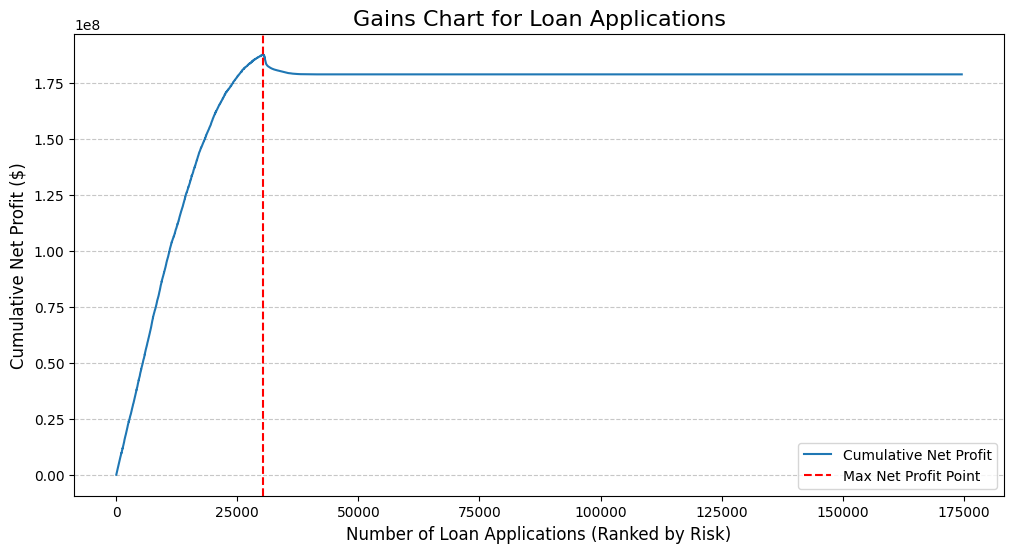

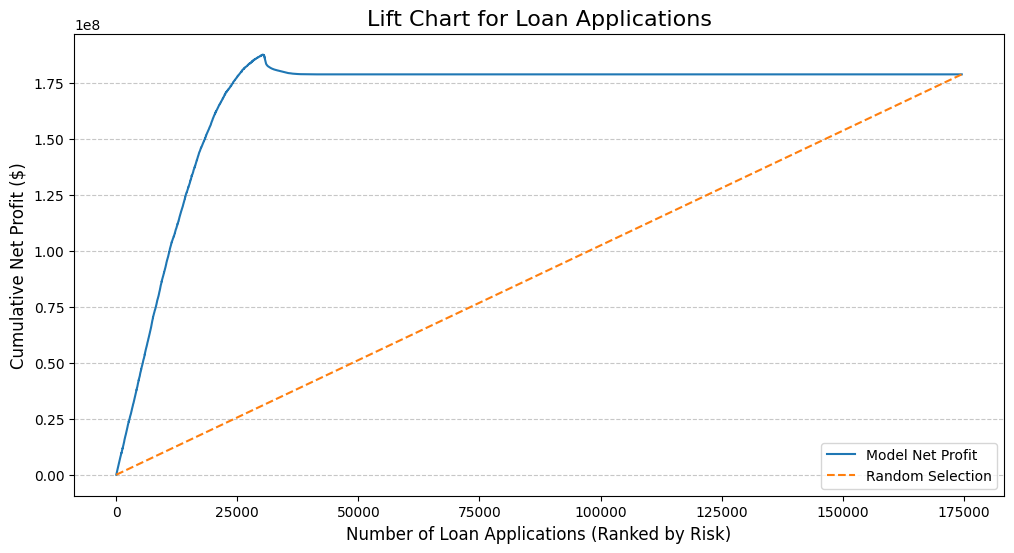

Maximum Net Profit: $187,801,661.75
Optimal Probability Cut-Off: 0.72


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = random_forest  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


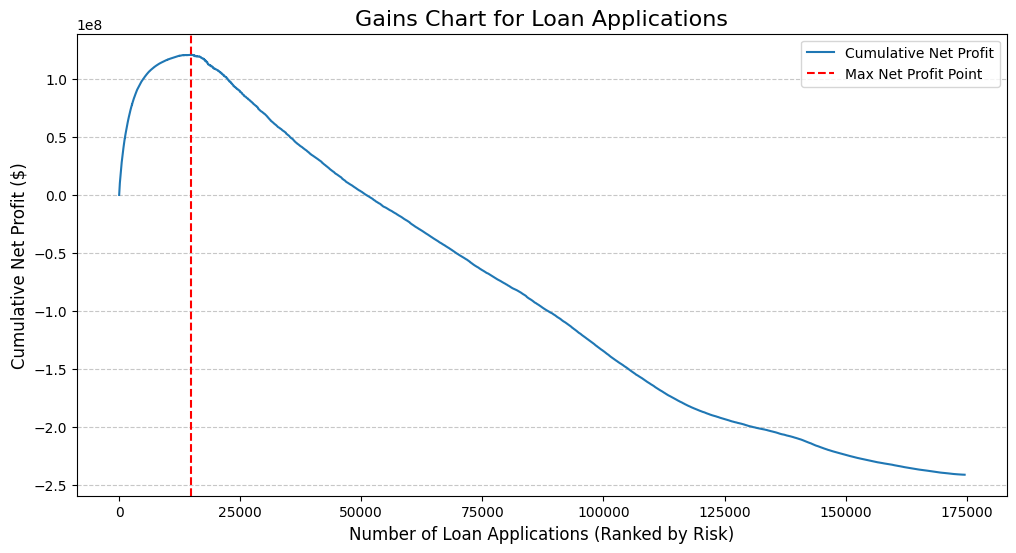

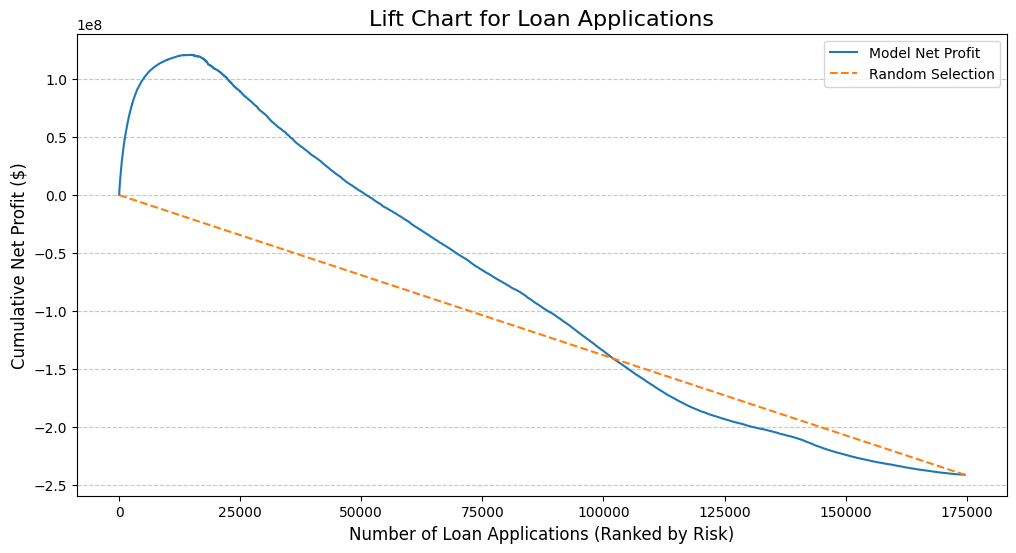

Maximum Net Profit: $121,183,072.08
Optimal Probability Cut-Off: 0.30


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = lda  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


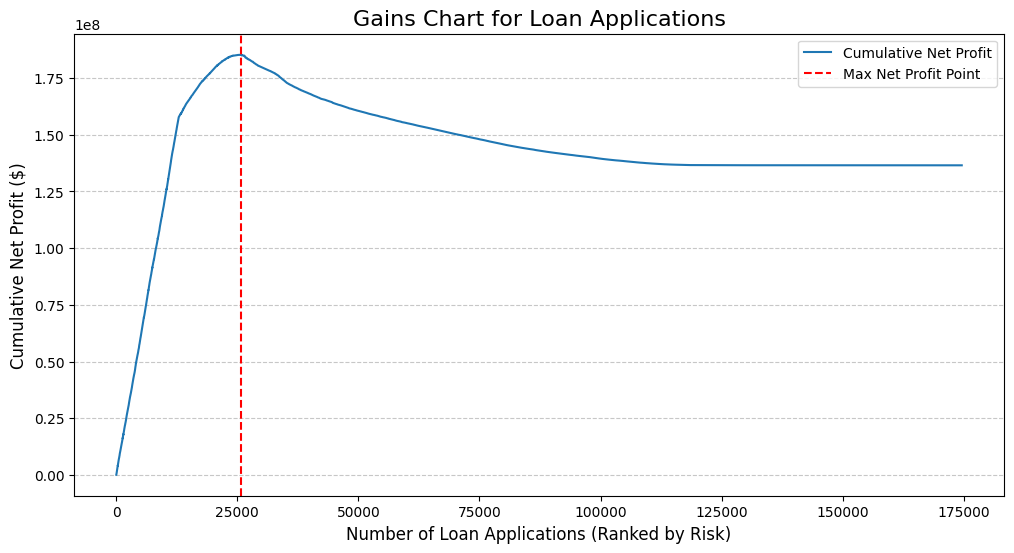

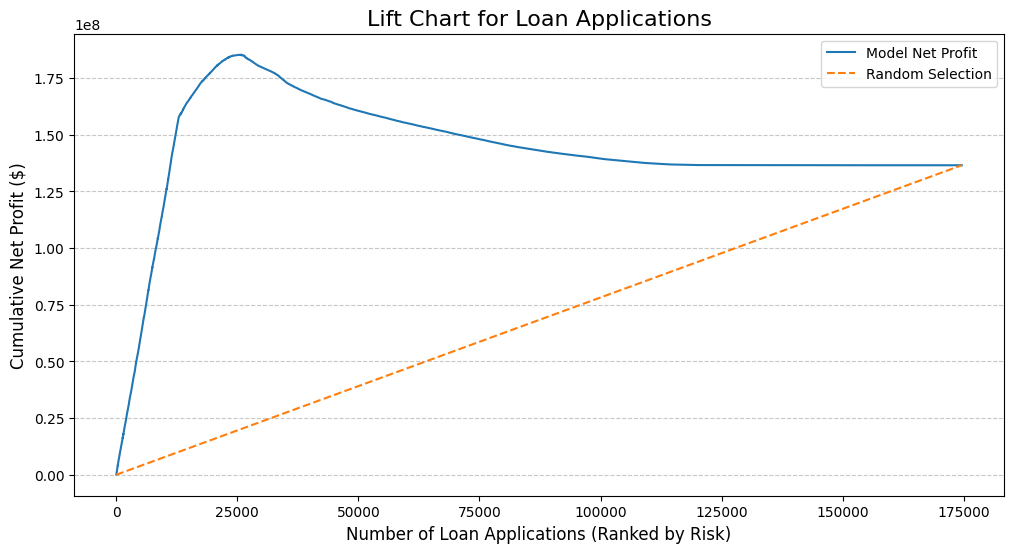

Maximum Net Profit: $185,302,340.27
Optimal Probability Cut-Off: 0.20


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = qda  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


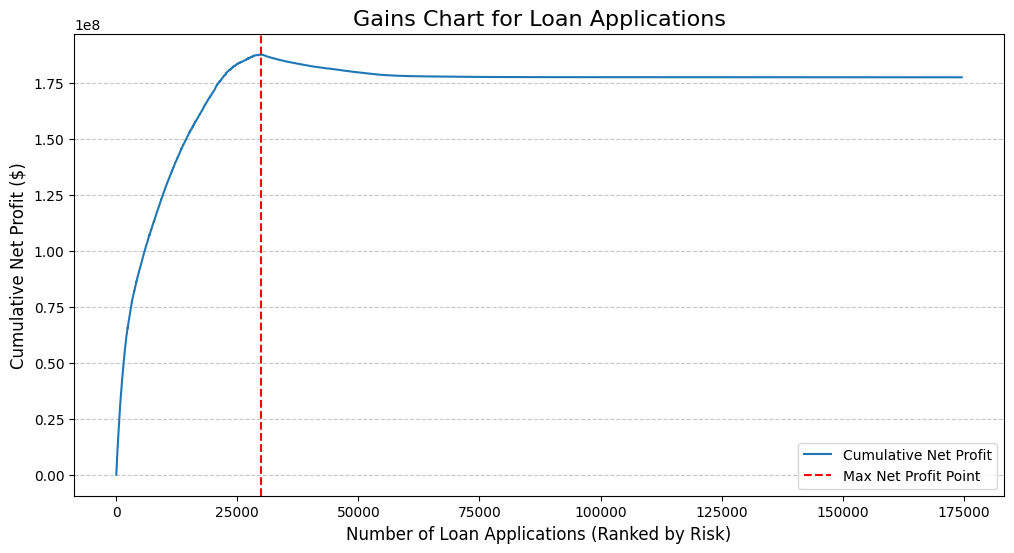

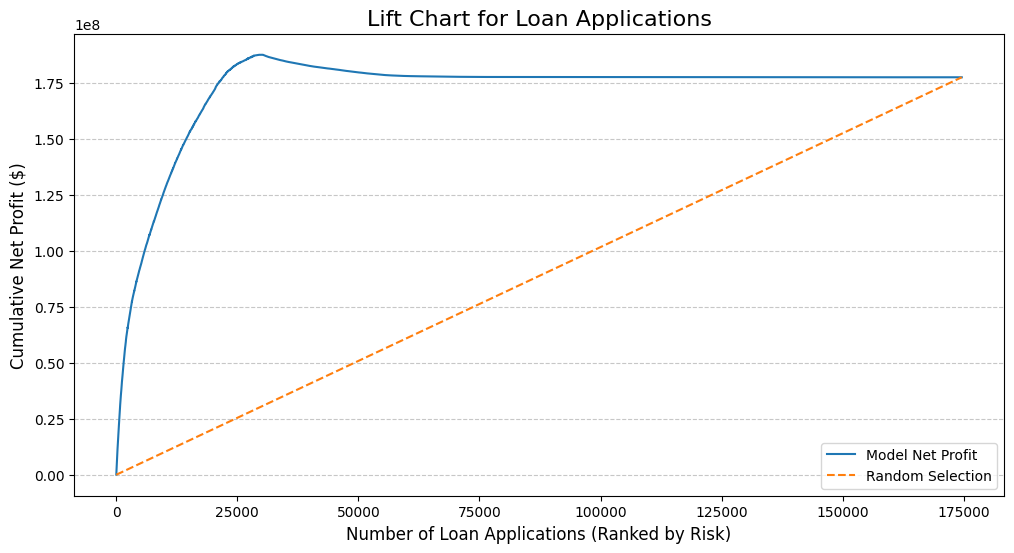

Maximum Net Profit: $187,702,741.34
Optimal Probability Cut-Off: 0.31


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = nn  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


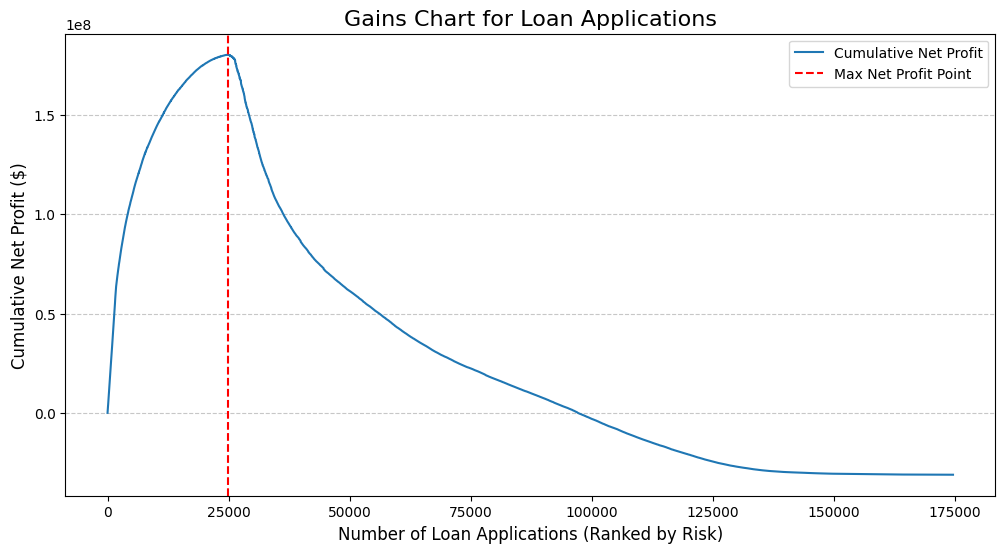

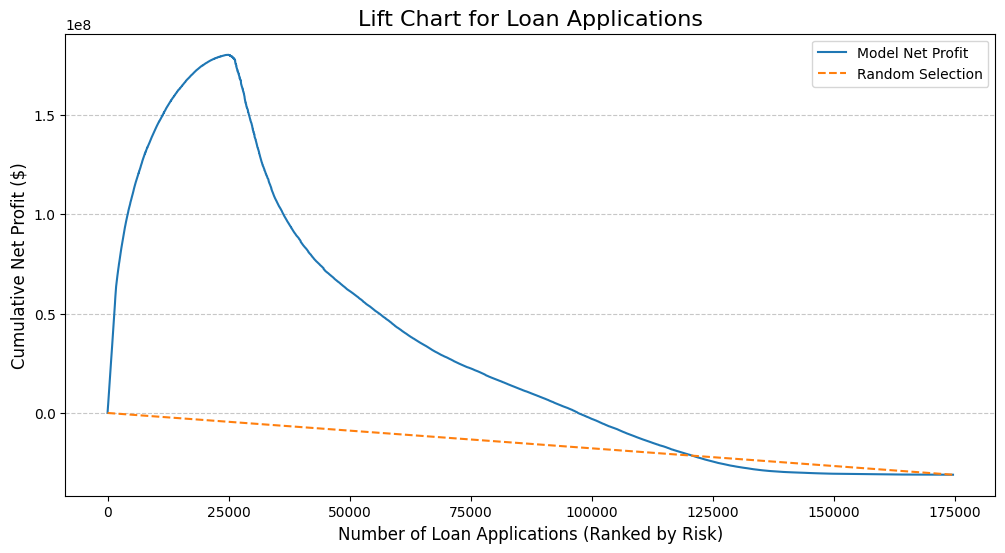

Maximum Net Profit: $180,185,062.59
Optimal Probability Cut-Off: 0.46


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = lasso  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


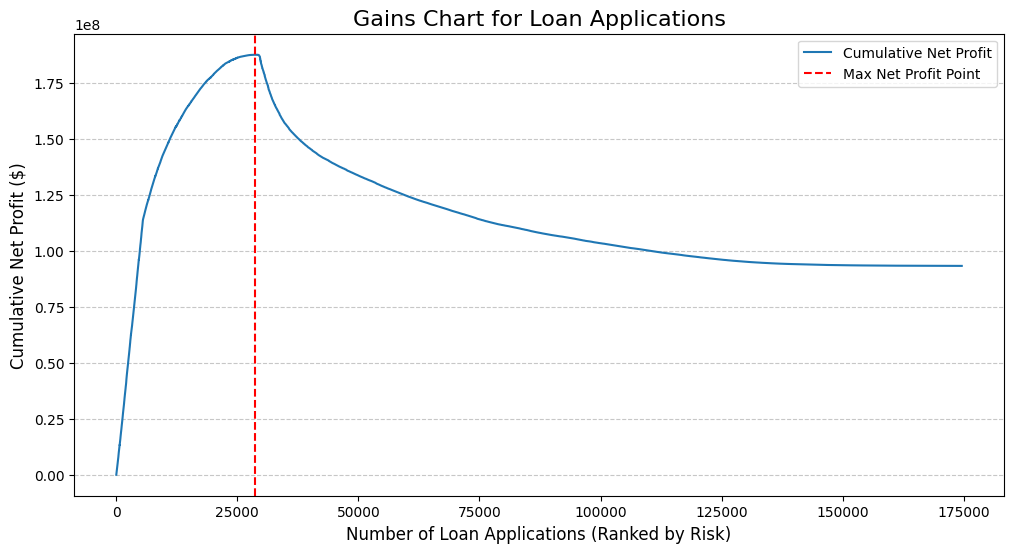

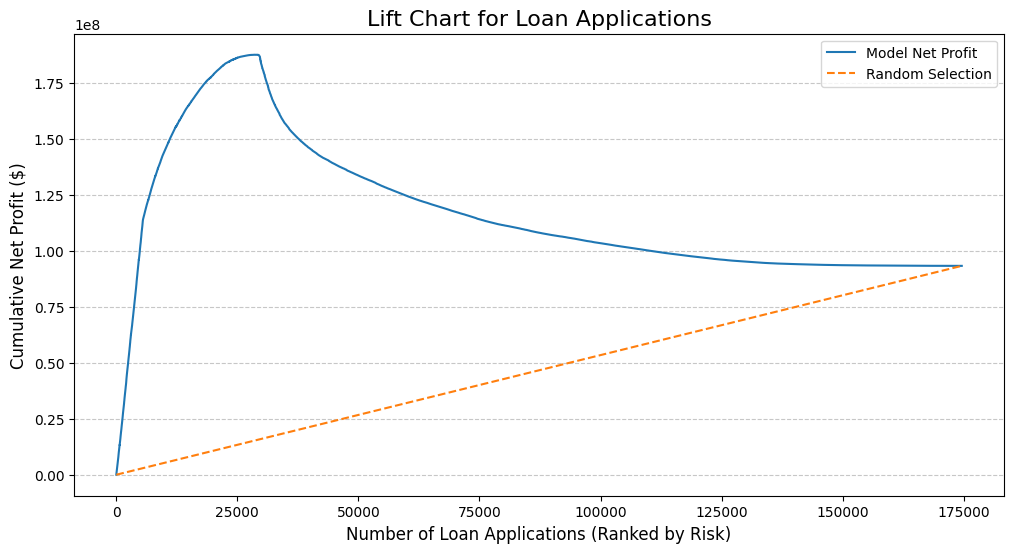

Maximum Net Profit: $187,509,357.81
Optimal Probability Cut-Off: 0.34


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = ridge  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


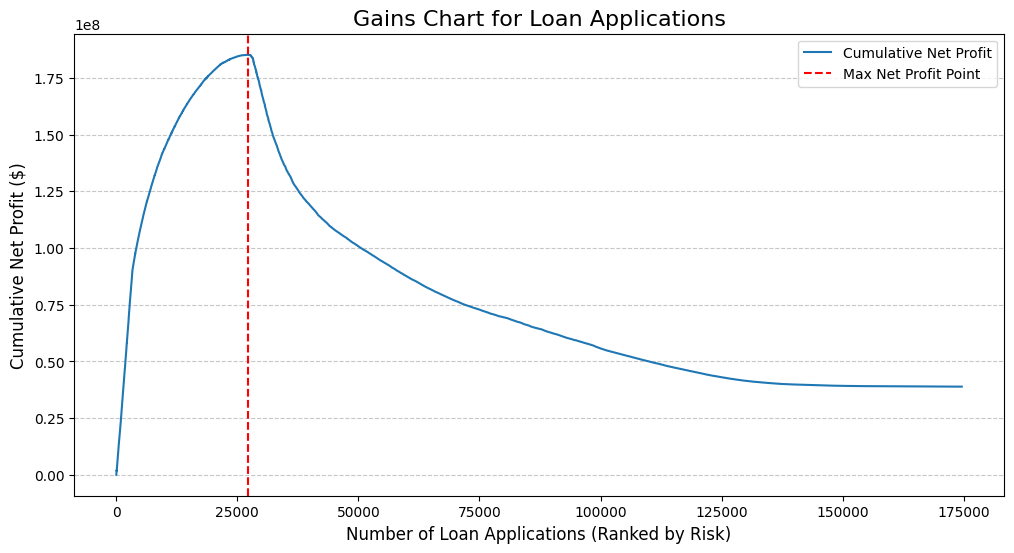

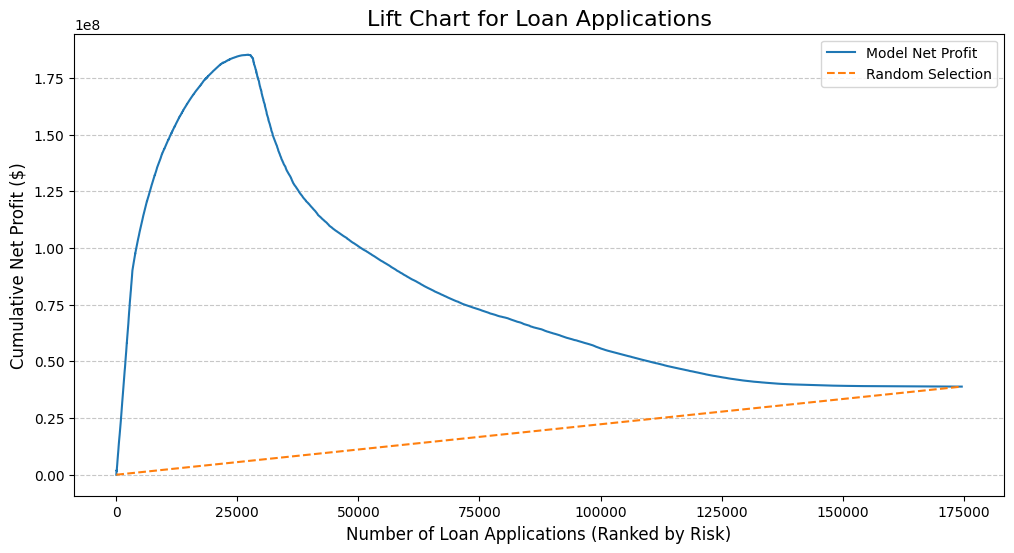

Maximum Net Profit: $185,252,271.53
Optimal Probability Cut-Off: 0.39


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = elastic # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


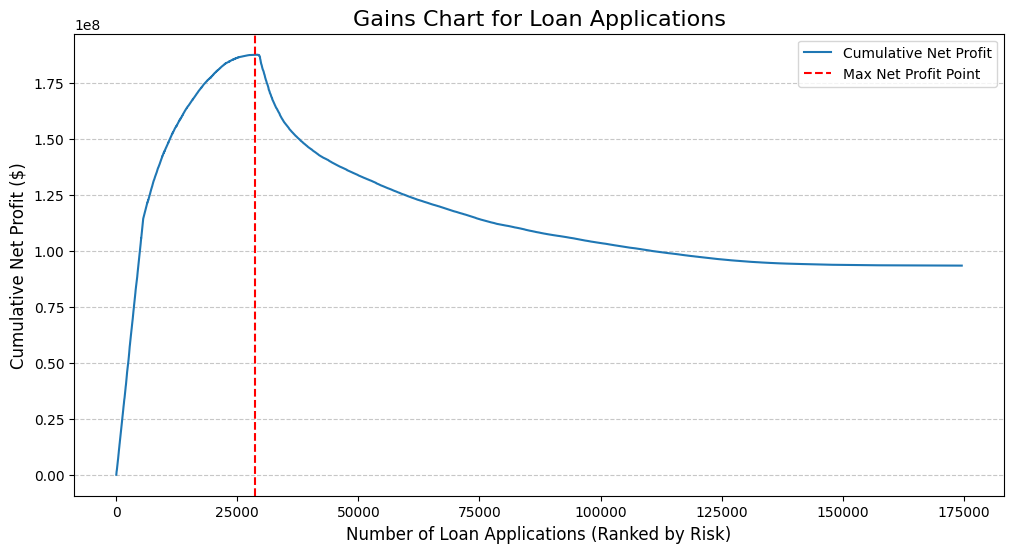

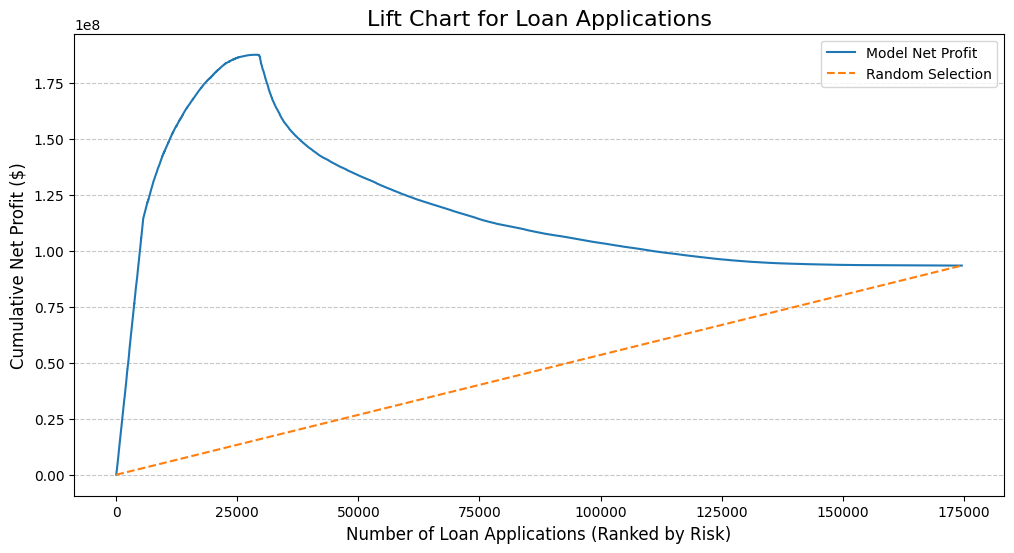

Maximum Net Profit: $187,518,028.44
Optimal Probability Cut-Off: 0.34


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = logit  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


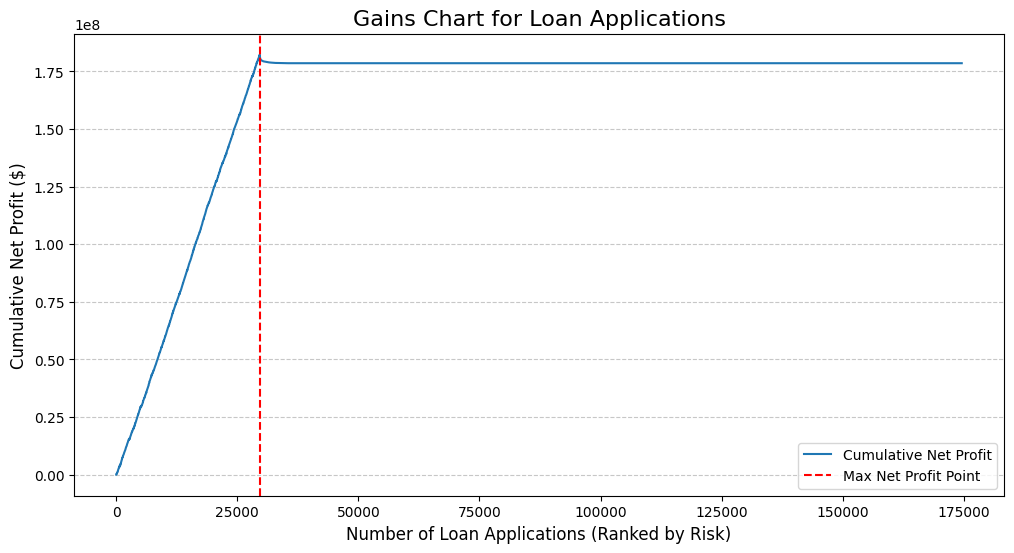

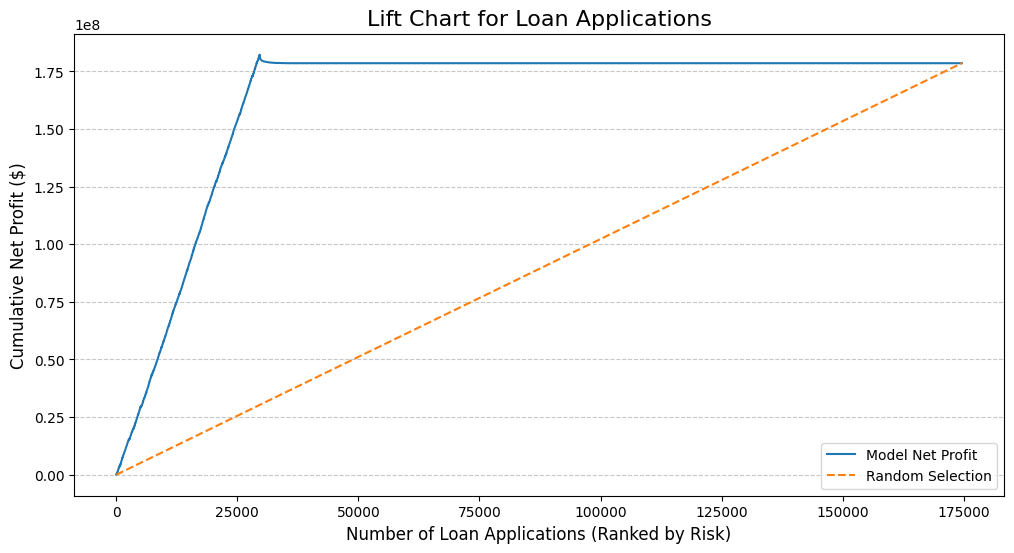

Maximum Net Profit: $182,254,049.90
Optimal Probability Cut-Off: 1.00


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = tree  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


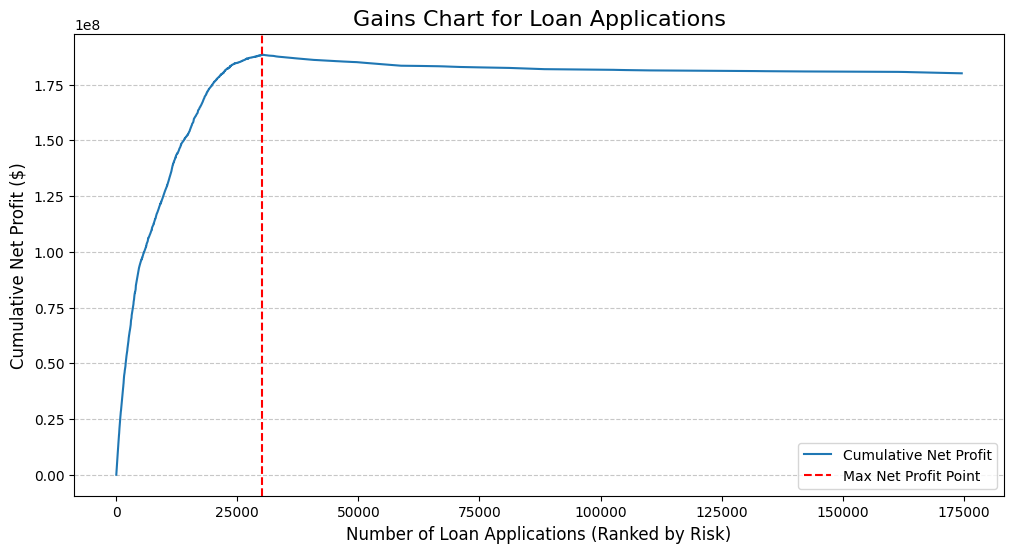

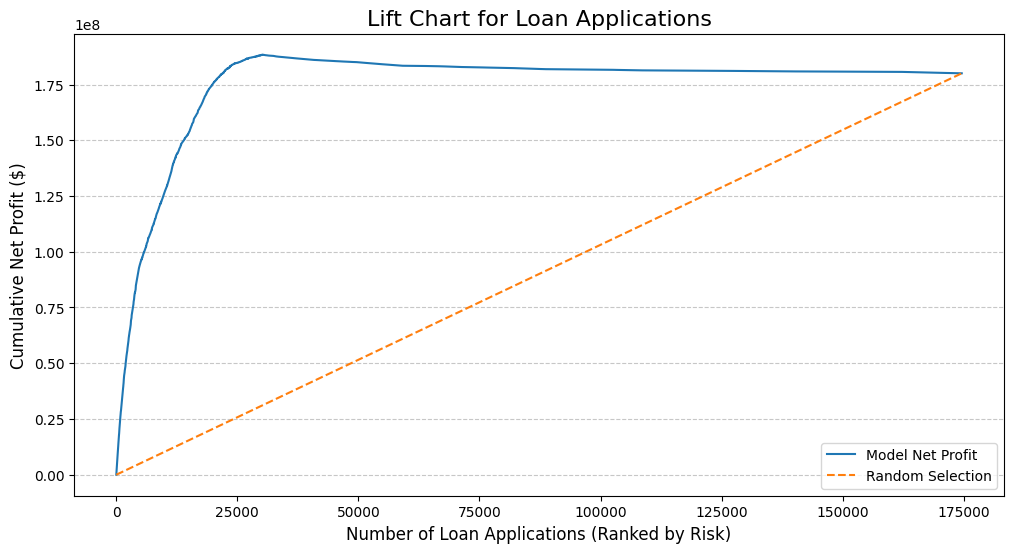

Maximum Net Profit: $188,367,349.41
Optimal Probability Cut-Off: 0.82


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = boosting  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


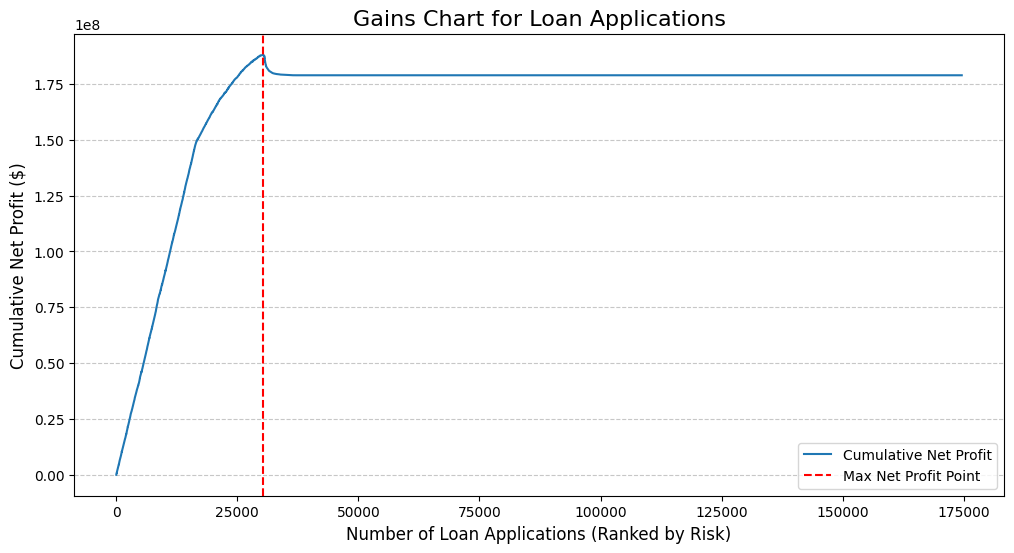

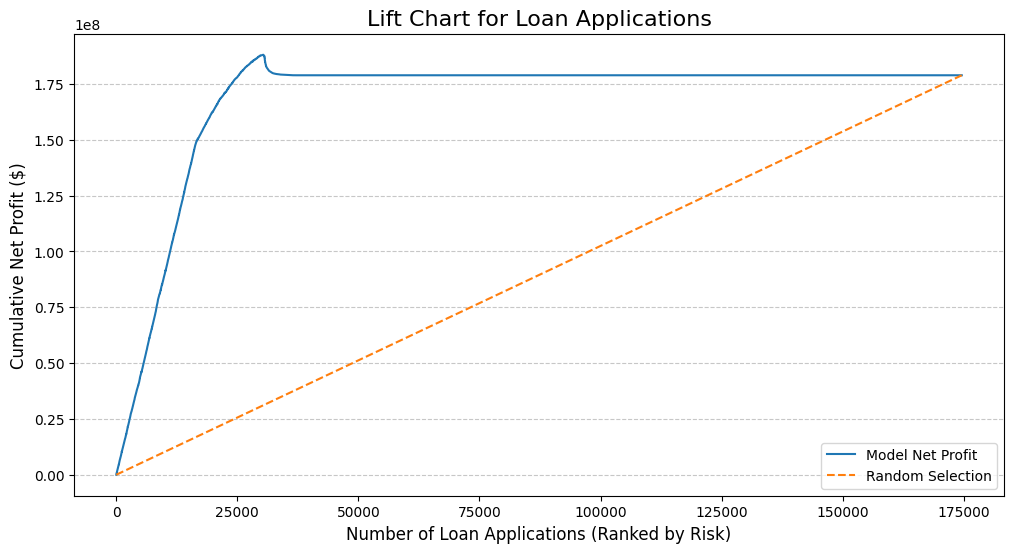

Maximum Net Profit: $188,067,276.13
Optimal Probability Cut-Off: 0.68


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = bagging  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")


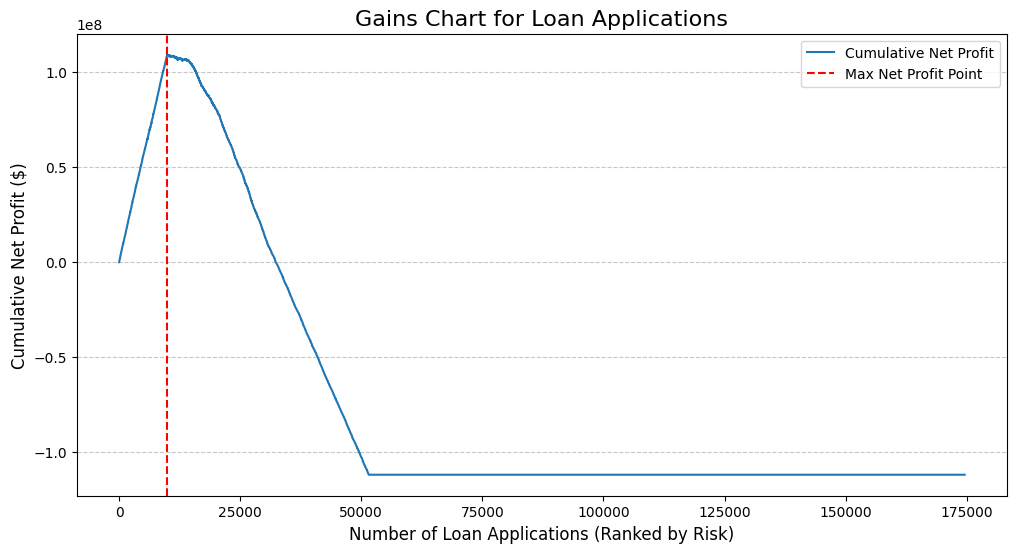

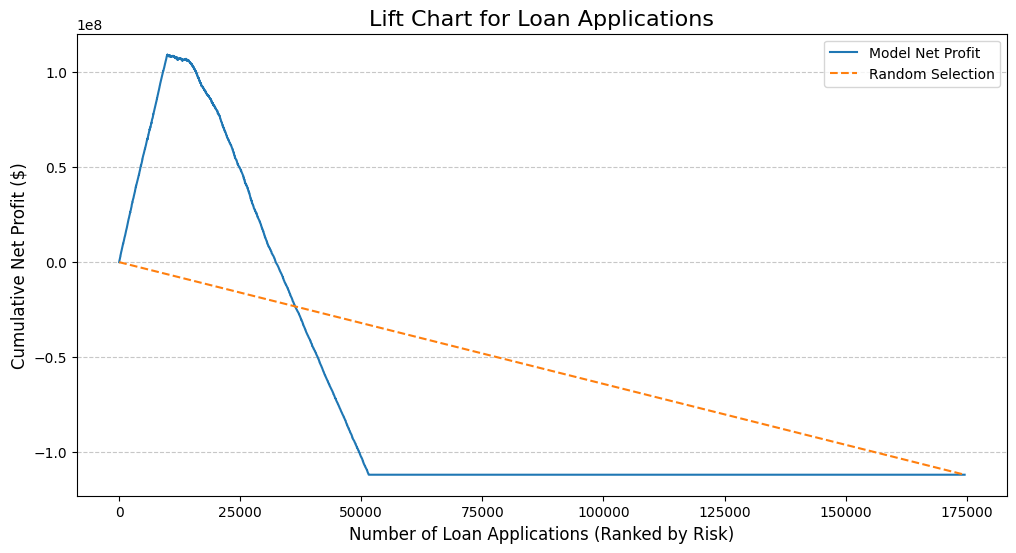

Maximum Net Profit: $109,070,799.14
Optimal Probability Cut-Off: 0.80


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the chosen model
model = knn  # Replace with your chosen model
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Calculate net profit vector
net_profit_vector = []
for prob, true_label, disbursement in zip(y_probs, y_test, disbursement_test):
    if true_label == 1:  # Paid in full
        net_profit_vector.append(prob * 0.05 * disbursement)
    else:  # Defaulted
        net_profit_vector.append(prob * -5 * (0.05 * disbursement))

# Step 3: Rank by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
sorted_net_profits = np.array(net_profit_vector)[sorted_indices]

# Step 4: Calculate cumulative net profits
cumulative_net_profits = np.cumsum(sorted_net_profits)

# Step 5: Gains Chart
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Cumulative Net Profit")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Gains Chart for Loan Applications", fontsize=16)
plt.axvline(x=np.argmax(cumulative_net_profits), color="red", linestyle="--", label="Max Net Profit Point")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 6: Lift Chart
random_selection_profit = np.cumsum(np.mean(net_profit_vector) * np.ones(len(net_profit_vector)))
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_net_profits) + 1), cumulative_net_profits, label="Model Net Profit")
plt.plot(range(1, len(cumulative_net_profits) + 1), random_selection_profit, label="Random Selection", linestyle="--")
plt.xlabel("Number of Loan Applications (Ranked by Risk)", fontsize=12)
plt.ylabel("Cumulative Net Profit ($)", fontsize=12)
plt.title("Lift Chart for Loan Applications", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Step 7: Identify maximum net profit and corresponding cut-off
max_net_profit_index = np.argmax(cumulative_net_profits)
max_net_profit = cumulative_net_profits[max_net_profit_index]
cutoff_probability = y_probs[sorted_indices[max_net_profit_index]]

print(f"Maximum Net Profit: ${max_net_profit:,.2f}")
print(f"Optimal Probability Cut-Off: {cutoff_probability:.2f}")
